## Task 3.2

### task 3.1.1

In [38]:
import numpy as np

def diffMatrix(u, v):
    return np.subtract.outer(u, v)
    
u = [1, 3]
v = [4, 5, 6, 7]
diffMatrix(u, v)

array([[-3, -4, -5, -6],
       [-1, -2, -3, -4]])

In [22]:
def diffMatrix(u, v):
    M = np.zeros((max(len(u), len(v)), min(len(u), len(v))))
    for i in range(max(len(u), len(v))):
        for j in range(min(len(u), len(v))):
            if(len(u) < len(v)):
                M[i, j] = v[i] - u[j]
            else:
                M[i, j] = u[i] - v[j]
    print(M)
u = [1, 2, 3]
v = [1, 2, 3, 4]
diffMatrix(u, v)

[[ 0. -1. -2.]
 [ 1.  0. -1.]
 [ 2.  1.  0.]
 [ 3.  2.  1.]]


### task 3.1.2

In [46]:
def prodMatrix(u, v):
    return np.multiply.outer(u, v)
u = [1, 3]
v = [4, 5, 6, 7]
prodMatrix(u, v)

array([[ 4,  5,  6,  7],
       [12, 15, 18, 21]])

In [48]:
def prodMatrix(u, v):
    M = np.zeros((max(len(u), len(v)), min(len(u), len(v))))
    for i in range(max(len(u), len(v))):
        for j in range(min(len(u), len(v))):
            if(len(u) < len(v)):
                M[i, j] = v[i] * u[j]
            else:
                M[i, j] = u[i] * v[j]
    return M.T
u = np.array([1, 3])
v = np.array([4, 5, 6, 7])
prodMatrix(u, v)

array([[ 4.,  5.,  6.,  7.],
       [12., 15., 18., 21.]])

## Task 3.2

### task 3.2.1

In [49]:
def linearKernelMatrix(alpha, u, v):
    return alpha * np.multiply.outer(u, v)

### task 3.2.2

In [52]:
def gaussKernelMatrix(alpha, u, v, sigma):
    return alpha * np.exp((-1) * np.subtract.outer(u, v) ** 2 / (2 * sigma ** 2))

u = np.array([1, 3])
v = np.array([4, 5, 6, 7])
gaussKernelMatrix(3, u, v, 2)

array([[0.9739574 , 0.40600585, 0.1318108 , 0.03332699],
       [2.64749071, 1.81959198, 0.9739574 , 0.40600585]])

In [53]:
def gaussKernelMatrix(alpha, u, v, sigma):
    K = np.zeros((max(len(u), len(v)), min(len(u), len(v))))
    for i in range(max(len(u), len(v))):
        for j in range(min(len(u), len(v))):
            if(len(u) < len(v)):
                K[i, j] = alpha * np.exp((-1) * (v[i] - u[j]) ** 2 / (2 * sigma ** 2))
            else:
                K[i, j] = alpha * np.exp((-1) * (u[i] - v[j]) ** 2 / (2 * sigma ** 2))
    return K.T
u = np.array([1, 3])
v = np.array([4, 5, 6, 7])
gaussKernelMatrix(3, u, v, 2)

array([[0.9739574 , 0.40600585, 0.1318108 , 0.03332699],
       [2.64749071, 1.81959198, 0.9739574 , 0.40600585]])

## Task 3.4

In [16]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

def normalization(y):
    y = np.array(y)
    I = np.array(np.ones(len(y)))
    return y - (np.outer(I.T, I) @ y) / len(y)

def kernel_matrix(x, teta):
    K = teta[0] * np.exp((-1) * (np.subtract.outer(x, x) ** 2) / (2 * teta[1] ** 2)) + teta[2] * np.multiply.outer(x, x) #+ teta[3] * np.diag(np.ones(len(x)))
    return K

def parameterized_matrix(K, teta):
    return K + teta[3] * np.diag(np.ones(K.shape[0]))

def negLikelihood(teta, x, y):
    K = kernel_matrix(X, teta)
    y_norm = normalization(y)
    C = parameterized_matrix(K, teta)

    det_C = np.linalg.det(C)
    inv_C = np.linalg.inv(C)
    res = np.dot(np.dot(y_norm, inv_C), y_norm) / 2
    return np.log(det_C) / 2 + y_norm.T @ inv_C @ y_norm / 2

def gaussian_proccess(X, y):
    teta = [1.0, 20.0, 0.5, 1.0]

    result = opt.minimize(negLikelihood, teta, args = (X, y), bounds=((0, None), (0, None), (0, None), (0, None)))
    return result.x
    
df = pd.read_csv('whDatadat.sec', sep=' ')
df = df.drop(['#', 'gender(m|f)', '(cm)'], axis = 1)
df = df[((df['weight(kg)'] != -1) & (df['size'] != 'm'))]
df = df.reset_index(drop=True)

X = np.array(df['size'], dtype=np.int64)
y = np.array(df['weight(kg)'], dtype=np.int64)
teta_hat = gaussian_proccess(X, y)

print("Answer: teta_hat = ", teta_hat)

Answer: teta_hat =  [41.75777847  6.98886267  0.         95.59333082]


## Task 3.5

### First Version

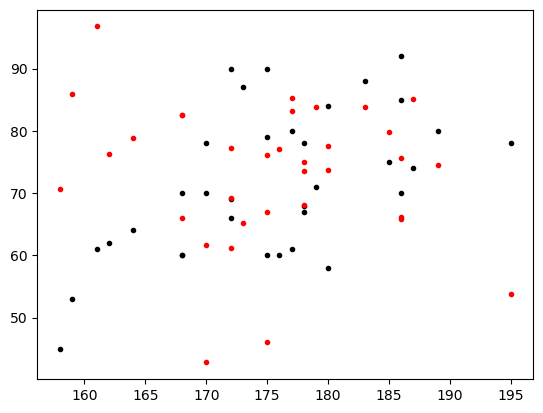

In [29]:
import matplotlib.pyplot as plt
import time
def get_de_normalization(y_mean, y):
    y = np.array(y)
    I = np.array(np.ones(len(y)))
    return y_mean + (np.outer(I.T, I) @ y) / len(y)

start = time.time()

df = pd.read_csv('whDatadat.sec', sep=' ')
df = df.drop(['#', 'gender(m|f)', '(cm)'], axis = 1)
df = df[((df['weight(kg)'] != -1) & (df['size'] != 'm'))]
df = df.reset_index(drop=True)

X = np.array(df['size'], dtype=np.int64)
y = np.array(df['weight(kg)'], dtype=np.int64)
teta_hat = gaussian_proccess(X, y)

C = kernel_matrix(X, teta_hat) + teta_hat[3] * np.diag(np.ones(len(X)))

y_mean_mark = np.random.multivariate_normal(mean = np.zeros(len(X)).T, cov = C)
y_mark = get_de_normalization(y_mean_mark, y)
end = time.time()

first_time = end - start

plt.plot(X, y, 'k.')
plt.plot(X, y_mark, 'r.')

plt.show()

### Second Version

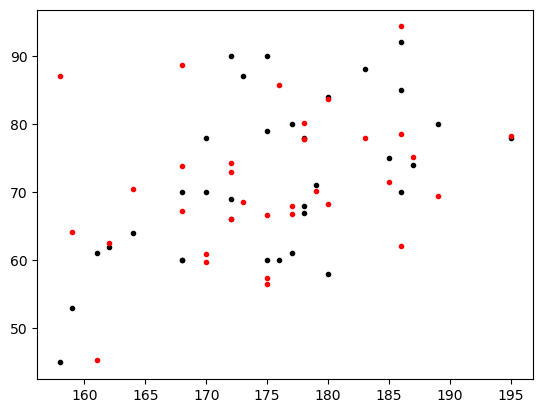

In [30]:
import matplotlib.pyplot as plt
def get_de_normalization(y_mean, y):
    y = np.array(y)
    I = np.array(np.ones(len(y)))
    return y_mean + (np.outer(I.T, I) @ y) / len(y)

start = time.time()
df = pd.read_csv('whDatadat.sec', sep=' ')
df = df.drop(['#', 'gender(m|f)', '(cm)'], axis = 1)
df = df[((df['weight(kg)'] != -1) & (df['size'] != 'm'))]
df = df.reset_index(drop=True)

X = np.array(df['size'], dtype=np.int64)
y = np.array(df['weight(kg)'], dtype=np.int64)
teta_hat = gaussian_proccess(X, y)

C = kernel_matrix(X, teta_hat) + teta_hat[3] * np.diag(np.ones(len(X)))
L = np.linalg.cholesky(C)

y_mean_mark = L @ np.random.multivariate_normal(mean = np.zeros(len(X)).T, cov = np.diag(np.ones(len(X))))
y_mark = get_de_normalization(y_mean_mark, y)

end = time.time()

second_time = end - start

plt.plot(X, y, 'k.')
plt.plot(X, y_mark, 'r.')

plt.show()

In [31]:
print("Computing time for First Version: ", first_time)
print("Computing time for Second Version: ", second_time)

Computing time for First Version:  0.052237749099731445
Computing time for Second Version:  0.05527472496032715
